# Reddit Project - 02: NLP - Data cleaning
***

## Import Packages

In [1223]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import regex as reg
import re
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

%matplotlib inline

### Convert the 10 'Spirituality' JSON files into pandas dataframes

In [968]:
spir_1 = pd.read_json('../data/spir1.json')
spir_2 = pd.read_json('../data/spir2.json')
spir_3 = pd.read_json('../data/spir3.json')
spir_4 = pd.read_json('../data/spir4.json')
spir_5 = pd.read_json('../data/spir5.json')
spir_6 = pd.read_json('../data/spir6.json')
spir_7 = pd.read_json('../data/spir7.json')
spir_8 = pd.read_json('../data/spir8.json')
spir_9 = pd.read_json('../data/spir9.json')
spir_10 = pd.read_json('../data/spir10.json')

### Concatenate all 10 spirituality dataframes into 1 dataframe

In [969]:
spr = pd.concat([spir_1, spir_2, spir_3, spir_4, spir_5, spir_6, spir_7, spir_8, spir_9, spir_10], ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


### Combine spr title and selftext

In [970]:
spr = spr['title'] + spr['selftext']

### Make spr a pandas dataframe again

In [971]:
spr = pd.DataFrame(spr)

### Change column name to 'text'

In [972]:
spr.columns = ['text']

In [973]:
spr

,text
0,Soul TribeJust trying to find my spiritual fam...
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...
2,"Spiritual awakening &amp; relationshipsHi, I'm..."
3,SpartacusIn one of my visions I am in a Ludus ...
4,"Mixing ""dreams"" with ""realities""?I often find ..."
...,...
9995,We aren't programs. Programs are a replica of ...
9996,"In This New Year of 2020, I have been doing qu..."
9997,Does anyone know about the trees and talks to ...
9998,I am big into spirituality and manifested myse...


### Add a binomial class column and set all spr rows to 1

In [974]:
spr['class_'] = 1

In [975]:
spr

,text,class_
0,Soul TribeJust trying to find my spiritual fam...,1
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1
2,"Spiritual awakening &amp; relationshipsHi, I'm...",1
3,SpartacusIn one of my visions I am in a Ludus ...,1
4,"Mixing ""dreams"" with ""realities""?I often find ...",1
...,...,...
9995,We aren't programs. Programs are a replica of ...,1
9996,"In This New Year of 2020, I have been doing qu...",1
9997,Does anyone know about the trees and talks to ...,1
9998,I am big into spirituality and manifested myse...,1


### Convert 'meditation' JSON files into pandas dataframes

In [976]:
med_1 = pd.read_json('../data/med1.json')
med_2 = pd.read_json('../data/med2.json')
med_3 = pd.read_json('../data/med3.json')
med_4 = pd.read_json('../data/med4.json')
med_5 = pd.read_json('../data/med5.json')
med_6 = pd.read_json('../data/med6.json')
med_7 = pd.read_json('../data/med7.json')
med_8 = pd.read_json('../data/med8.json')
med_9 = pd.read_json('../data/med9.json')
med_10 = pd.read_json('../data/med10.json')

### Concatenate all 10 meditation dataframes into 1 dataframe

In [977]:
med = pd.concat([med_1, med_2, med_3, med_4, med_5, med_6, med_7, med_8, med_9, med_10], ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


### Combine med title with selftext into 1 column

In [978]:
med = med['title'] + med['selftext']

### Make med a pandas dataframe and change text column title to 'text'

In [979]:
med = pd.DataFrame(med)

In [980]:
med.columns = ['text']

### Convert text column to an object data type

In [981]:
med['text'].astype(object)

0       Stop the internal chatter and just go..https:/...
1       Guided Meditation - where to start??Hello beau...
2       Practicing meditation at monotonous workHey pe...
3       Meditation after saunaThe deepest meditation I...
4       Letting go of breathing...I have great difficu...
                              ...                        
9995           Meditation to help with Addiction[removed]
9996    Body scanWhen doing the "body scan" meditation...
9997    How do I experience the extreme calm some peop...
9998    Relentless obsessive mental chatterNot just du...
9999    try meditating like this&amp;#x200B;\n\n&amp;#...
Name: text, Length: 10000, dtype: object

### Add a binomial class column to med and assign all med rows to 0

In [982]:
med['class_'] = 0

In [983]:
med

,text,class_
0,Stop the internal chatter and just go..https:/...,0
1,Guided Meditation - where to start??Hello beau...,0
2,Practicing meditation at monotonous workHey pe...,0
3,Meditation after saunaThe deepest meditation I...,0
4,Letting go of breathing...I have great difficu...,0
...,...,...
9995,Meditation to help with Addiction[removed],0
9996,"Body scanWhen doing the ""body scan"" meditation...",0
9997,How do I experience the extreme calm some peop...,0
9998,Relentless obsessive mental chatterNot just du...,0


### Concatenate 'spirituality' and 'meditation' into 1 dataframe

In [984]:
spm = pd.concat([spr, med])

### Reset the index so that it counts from 0 to 20,0000

In [985]:
spm = spm.reset_index(drop=True)

### Look for null values

In [986]:
spm.isna().sum()

text      10
class_     0
dtype: int64

### Drop null values

In [987]:
spm.dropna(inplace=True)

In [988]:
spm.isna().sum()

text      0
class_    0
dtype: int64

### Clean spm strings by removing: 
1. line breaks, 
2. apostrophes, 
3. punctuation, 
4. xa0, 
5. mentions of any subreddit, 
6. urls 

### and leaving only the letters

In [989]:
spm['text'].map(lambda x: re.sub('\/\/', '', x)) # Removing line breaks
spm['text'] = spm['text'].map(lambda x: re.sub('[\\][\']', '', x)) # Removing apostrophes
spm['text'] = spm['text'].map(lambda x: re.sub('[^\w\s]', ' ', x)) # Removing all punctuation 
spm['text'] = spm['text'].map(lambda x: re.sub('\xa0', ' ', x)) # removing xa0
spm['text'] = spm['text'].map(lambda x: re.sub('\n', ' ', x)) # removing line break
spm['text'] = spm['text'].map(lambda x: re.sub('\s[\/]?r\/[^\s]+', ' ', x)) # removing mentions of any subreddit
spm['text'] = spm['text'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x)) # removing urls
spm['text'] = spm['text'].map(lambda x: re.sub("[^a-zA-Z]", " ", x)) # Only keeping letters

In [990]:
spm

,text,class_
0,Soul TribeJust trying to find my spiritual fam...,1
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1
2,Spiritual awakening amp relationshipsHi Im ...,1
3,SpartacusIn one of my visions I am in a Ludus ...,1
4,Mixing dreams with realities I often find ...,1
...,...,...
19995,Meditation to help with Addictionremoved,0
19996,Body scanWhen doing the body scan meditation...,0
19997,How do I experience the extreme calm some peop...,0
19998,Relentless obsessive mental chatterNot just du...,0


### Make all letters lower case

In [991]:
spm['text'].str.lower()

0        soul tribejust trying to find my spiritual fam...
1        the journey to lifes riches began by making yo...
2        spiritual awakening  amp  relationshipshi  im ...
3        spartacusin one of my visions i am in a ludus ...
4        mixing  dreams  with  realities  i often find ...
                               ...                        
19995             meditation to help with addictionremoved
19996    body scanwhen doing the  body scan  meditation...
19997    how do i experience the extreme calm some peop...
19998    relentless obsessive mental chatternot just du...
19999    try meditating like this amp  x   b    amp  x ...
Name: text, Length: 19990, dtype: object

### Drop all duplicate rows

In [992]:
spm.drop_duplicates(inplace=True)

In [993]:
spm.shape

(19756, 2)

### spm Dateframe is now 19,756 rows
***
### Create a target (y variable)

In [1010]:
target_ = spm['class_']

### Create Columns of character count and word count

In [1011]:
spm['char_count'] = spm.text.map(len)

In [1012]:
spm['word_count'] = spm.text.map(lambda x: len(x.split()))

In [1013]:
spm['class_'].value_counts()

1    9898
0    9858
Name: class_, dtype: int64

In [1014]:
spm.head(2)

,text,class_,char_count,word_count
0,Soul TribeJust trying to find my spiritual fam...,1,65,11
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1,134,22


### Create histograms to depict character counts and word counts of spirituality and meditation

In [1186]:
char_count_mask = (spm['char_count'] < 4000)
med_mask = (spm['class_']==0)
spr_mask = (spm['class_']==1)

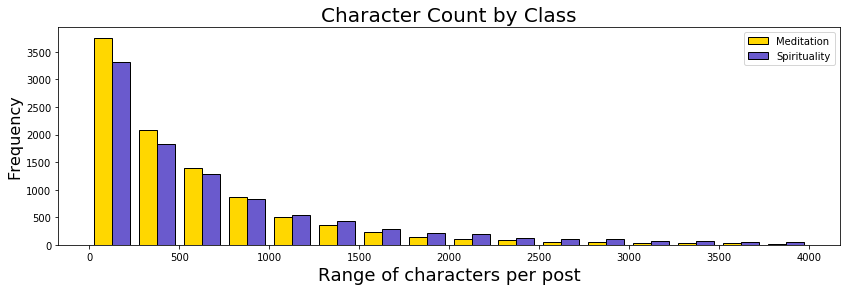

In [1212]:
plt.figure(figsize=(14,4))
plt.hist([spm[char_count_mask & med_mask]['char_count'], spm[char_count_mask & spr_mask]['char_count']],
         bins=16, color=['gold', 'slateblue'], ec='k')
plt.title('Character Count by Class', fontsize=20)
plt.xlabel('Range of characters per post', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['Meditation', 'Spirituality'])

In [1195]:
word_count_mask = (spm['char_count'] < 2000)
med_w_mask = (spm['class_']==0)
spr_w_mask = (spm['class_']==1)

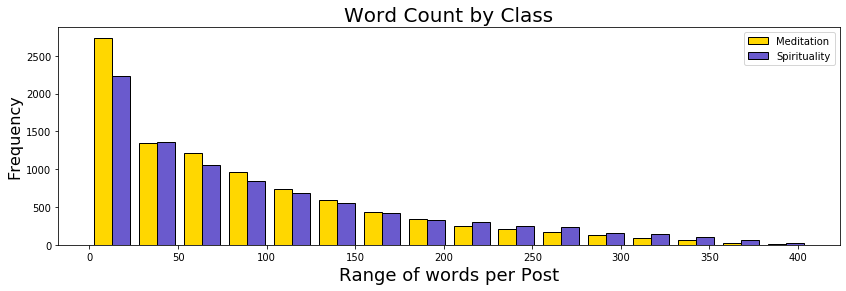

In [1222]:
plt.figure(figsize=(14,4))
plt.hist([spm[word_count_mask & med_w_mask]['word_count'], spm[word_count_mask & spr_w_mask]['word_count']],
         bins=16, color=['gold', 'slateblue'], ec='k')
plt.title('Word Count by Class', fontsize=20)
plt.xlabel('Range of words per Post', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['Meditation', 'Spirituality'])

### Plotting a bar chart of the mean values of character and word counts for classes 0 and 1

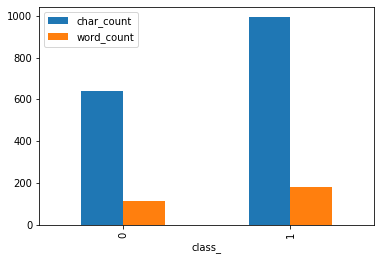

In [1017]:
spm.groupby(spm['class_']).mean().plot(kind='bar')

### Get CountVec for All Text

In [1164]:
#stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('like')
stopwords.append('just')
stopwords.append('really')
stopwords.append('im')
stopwords.append('amp')
stopwords.append('would')
stopwords.append('get')
stopwords.append('something')
stopwords.append('dont')
stopwords.append('people')
stopwords.append('even')
stopwords.append('go')
stopwords.append('also')

In [1165]:
cvec = CountVectorizer(stop_words=stopwords, min_df=5, max_df=1.0)

In [1166]:
term_mat = cvec.fit_transform(spm['text'])

In [1167]:
len(cvec.get_feature_names())

12742

### Create a pandas DataFrame with columns for each feature name

In [1168]:
term_spm = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

### Create target column from class column and insert it into the dataframe as the first column

In [1169]:
term_spm.insert(0, 'target_', target)

In [1170]:
term_spm['target_'].value_counts()

1.0    9898
0.0    9616
Name: target_, dtype: int64

In [1171]:
term_spm.head()

,target_,aa,ab,aback,abandon,abandoned,abandoning,abandonment,abd,abdomen,...,zeus,zinn,zodiac,zombie,zombies,zone,zoned,zones,zoning,zoom
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group Target column by mean of each feature name

In [1172]:
term_spm.groupby('target_').mean()

,aa,ab,aback,abandon,abandoned,abandoning,abandonment,abd,abdomen,abdominal,...,zeus,zinn,zodiac,zombie,zombies,zone,zoned,zones,zoning,zoom
target_,,,,,,,,,,,,,,,,,,,,,
0.0,0.000104,0.000416,0.000000,0.000832,0.000208,0.000416,0.000208,0.000312,0.003328,0.000624,...,0.000104,0.00052,0.000000,0.000624,0.000208,0.006552,0.000728,0.000104,0.000728,0.000936
1.0,0.001515,0.000303,0.000404,0.002728,0.004849,0.000909,0.001010,0.000505,0.000303,0.000101,...,0.004041,0.00000,0.002627,0.002021,0.000303,0.003940,0.000303,0.001111,0.000101,0.000909


### Group Target column by sum of each feature name

In [1173]:
term_spm.groupby('target_').sum()

,aa,ab,aback,abandon,abandoned,abandoning,abandonment,abd,abdomen,abdominal,...,zeus,zinn,zodiac,zombie,zombies,zone,zoned,zones,zoning,zoom
target_,,,,,,,,,,,,,,,,,,,,,
0.0,1,4,0,8,2,4,2,3,32,6,...,1,5,0,6,2,63,7,1,7,9
1.0,15,3,4,27,48,9,10,5,3,1,...,40,0,26,20,3,39,3,11,1,9


### Display the top 20 terms for Meditation

In [1174]:
term_spm.groupby('target_').mean().T.sort_values(0, ascending=False).head(20)

target_,0.0,1.0
meditation,1.155886,0.108507
feel,0.382696,0.513740
time,0.364705,0.446858
mind,0.336210,0.275207
meditating,0.314372,0.032734
thoughts,0.285046,0.181754
one,0.272879,0.589210
ive,0.263831,0.206203
know,0.258007,0.521722
day,0.249688,0.227622


### Display the top 20 terms for Spirituality

In [1175]:
term_spm.groupby('target_').mean().T.sort_values(1, ascending=False).head(20)

target_,0.0,1.0
life,0.246464,0.708325
one,0.272879,0.589210
know,0.258007,0.521722
feel,0.382696,0.513740
time,0.364705,0.446858
spiritual,0.047109,0.388664
love,0.106697,0.385937
things,0.169405,0.360780
want,0.176269,0.334108
god,0.019967,0.319155


### Check to see what the top overlapping terms are between Meditation and Spirituality

In [1176]:
top_words_meditation = list(term_spm.groupby('target_').
     mean().T.sort_values(0, ascending=False).head(20).index)

top_words_spirituality = list(term_spm.groupby('target_').
     mean().T.sort_values(1, ascending=False).head(20).index)

In [1177]:
top_words_overlap = [spir for spir in top_words_spirituality if spir in top_words_meditation]

In [1178]:
top_words_overlap

['life', 'one', 'know', 'feel', 'time', 'think', 'mind']

### Create a sentiment analyzer to evaluate sentiment of the meditation and spirituality subreddits
***
### Instantiate the sentiment analyzer

In [1224]:
sia = SentimentIntensityAnalyzer()

### Write a function to get the compound sentiment scores for a post

In [1225]:
def get_compound_sentiment(post):
    return sia.polarity_scores(post)['compound']

In [1226]:
spm.head()

,text,class_,char_count,word_count
0,Soul TribeJust trying to find my spiritual fam...,1,65,11
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1,134,22
2,Spiritual awakening amp relationshipsHi Im ...,1,953,174
3,SpartacusIn one of my visions I am in a Ludus ...,1,2133,371
4,Mixing dreams with realities I often find ...,1,314,56


In [1227]:
spm['sentiment'] = spm['text'].apply(get_compound_sentiment)

In [1228]:
spm.head()

,text,class_,char_count,word_count,sentiment
0,Soul TribeJust trying to find my spiritual fam...,1,65,11,0.0000
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1,134,22,0.8964
2,Spiritual awakening amp relationshipsHi Im ...,1,953,174,-0.5804
3,SpartacusIn one of my visions I am in a Ludus ...,1,2133,371,0.7587
4,Mixing dreams with realities I often find ...,1,314,56,0.6705


### Look at the distribution of the composite sentiment score

class_
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sentiment, dtype: object

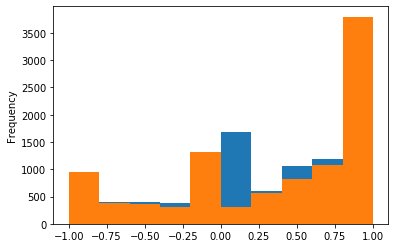

In [1236]:
spm.groupby('class_')['sentiment'].plot(kind = 'hist')

### Mostly neutral to positive sentitment posts for meditation and spirituality
***
### Save spm to csv to open in the model notebooks

In [1238]:
spm.to_csv('../data/spm.csv', index = False)